<a href="https://colab.research.google.com/github/gladysbabs/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
 - Author: Gladys Nacuka Babirye Bagandanswa


 ## Project Overview

## Load and Inspect Data

In [2]:
import pandas as pd
fpath= "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales_prediction = pd.read_csv(fpath)

In [3]:
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows?
8523

How many columns?
12

###Adressing any descripancies in datatypes

In [5]:
#What are the datatypes of each variable?
df_sales_prediction.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#Are there duplicates? If so, drop any duplicates.
df_sales_prediction_duplicated=df_sales_prediction.duplicated(keep=False)
df_sales_prediction_duplicated.sum()

0

- There are no duplicates

###Addressing Missing Values

In [7]:
#missing values.
missing_values=df_sales_prediction.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Getting the percentage ratios of missing values:
missing_values/len(df_sales_prediction)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

- There are missing values in the Item_Weight column with 17%
- There are missing values in the Outlet_Size column with 28%

In [9]:
#Adressing the missing values in the Item_weight column with the mean of the Item_weight values.
item_weight_av=df_sales_prediction['Item_Weight'].mean()
df_sales_prediction['Item_Weight']=df_sales_prediction['Item_Weight'].fillna(item_weight_av)

In [10]:
df_sales_prediction['Item_Weight'].isna().sum()

0

In [11]:
#Filling the missing values in the Outlet_Size column with 'MISSING'.
df_sales_prediction['Outlet_Size']=df_sales_prediction['Outlet_Size'].fillna('MISSING')

In [12]:
#Checking result if there're still missing values:
df_sales_prediction.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Checking for Inconsistencies in the Data

In [13]:
#Assigning object columns to a variable:
cols_obj=df_sales_prediction.select_dtypes(object)
cols_obj.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [14]:
#Performing a value count on all the string datatype columns:
for cols in cols_obj:
  print(f"The value count for {cols}")
  print(df_sales_prediction[cols].value_counts())
  print('\n')

The value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OU

- There is an inconsistency observed in the **Item_Fat_Content** column. So we need to rectify that. **LF** should be **Low Fat**, **reg** should be **Regular**, **low fat** should be **Low Fat**.


In [15]:
#Addressing the inconsistencies in the column: Item_Fat_Content
df_sales_prediction['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
#Checking results:
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
col_num=df_sales_prediction.select_dtypes('number')
col_num.describe().loc[['min','max','mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


## Exploratory Data Analysis

###Univariant Plots

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-18-bafa622c15de>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


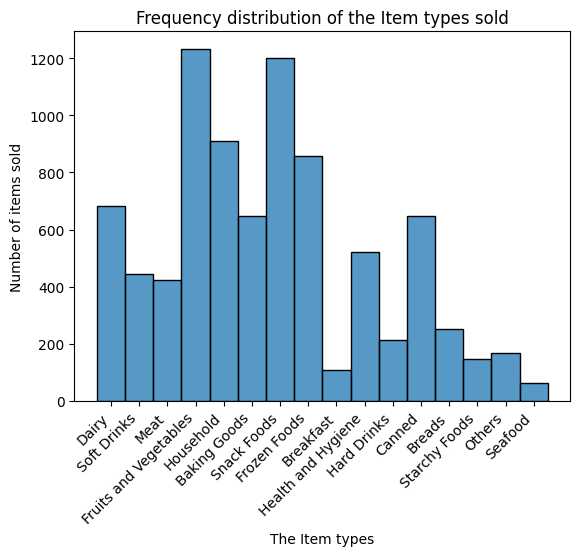

In [18]:
#Histogram of various Item_Types:
ax=sns.histplot(df_sales_prediction,x='Item_Type')
ax.set_xlabel('The Item types')
ax.set_ylabel('Number of items sold')
ax.set_title('Frequency distribution of the Item types sold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- It can clearly be seen that Fruits and vegetables sell the most, followed by snack foods.

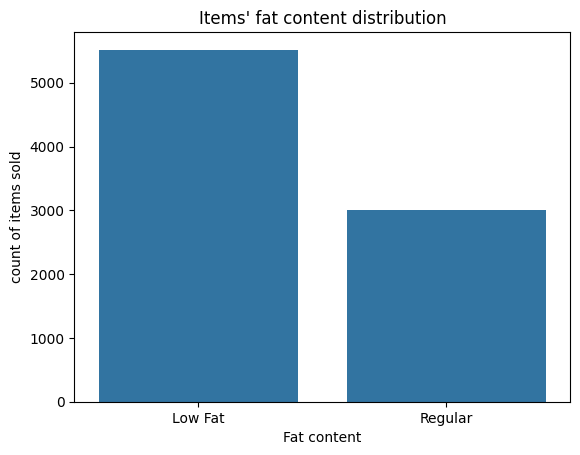

In [19]:
#countplot showing Item_Fat_Content:
ax=sns.countplot(df_sales_prediction,x='Item_Fat_Content')
ax.set_xlabel('Fat content')
ax.set_ylabel('count of items sold')
ax.set_title("Items' fat content distribution");

- Low fat items sold more off the shelves.

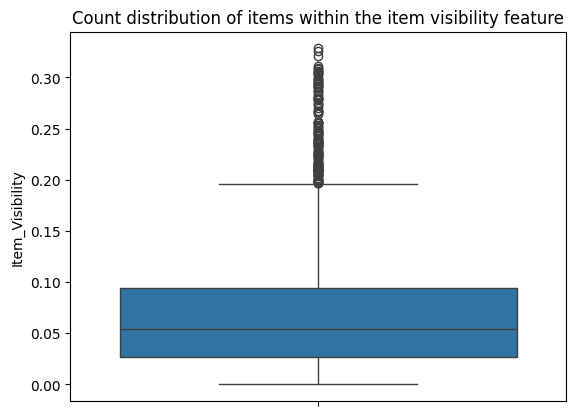

In [76]:
#Boxplot showing Item_Visibility:
ax=sns.boxplot(df_sales_prediction,y='Item_Visibility')
ax.set_title('Count distribution of items within the item visibility feature');

- The median of the Item visibility is at 0.05 which is quite low and there are more outliers with visibility beyond 0.2, most probably indicating that these items have a prerequisite for branding and packaging so as to continuously improve their visibility on the shelves.

###Multivariant Plots

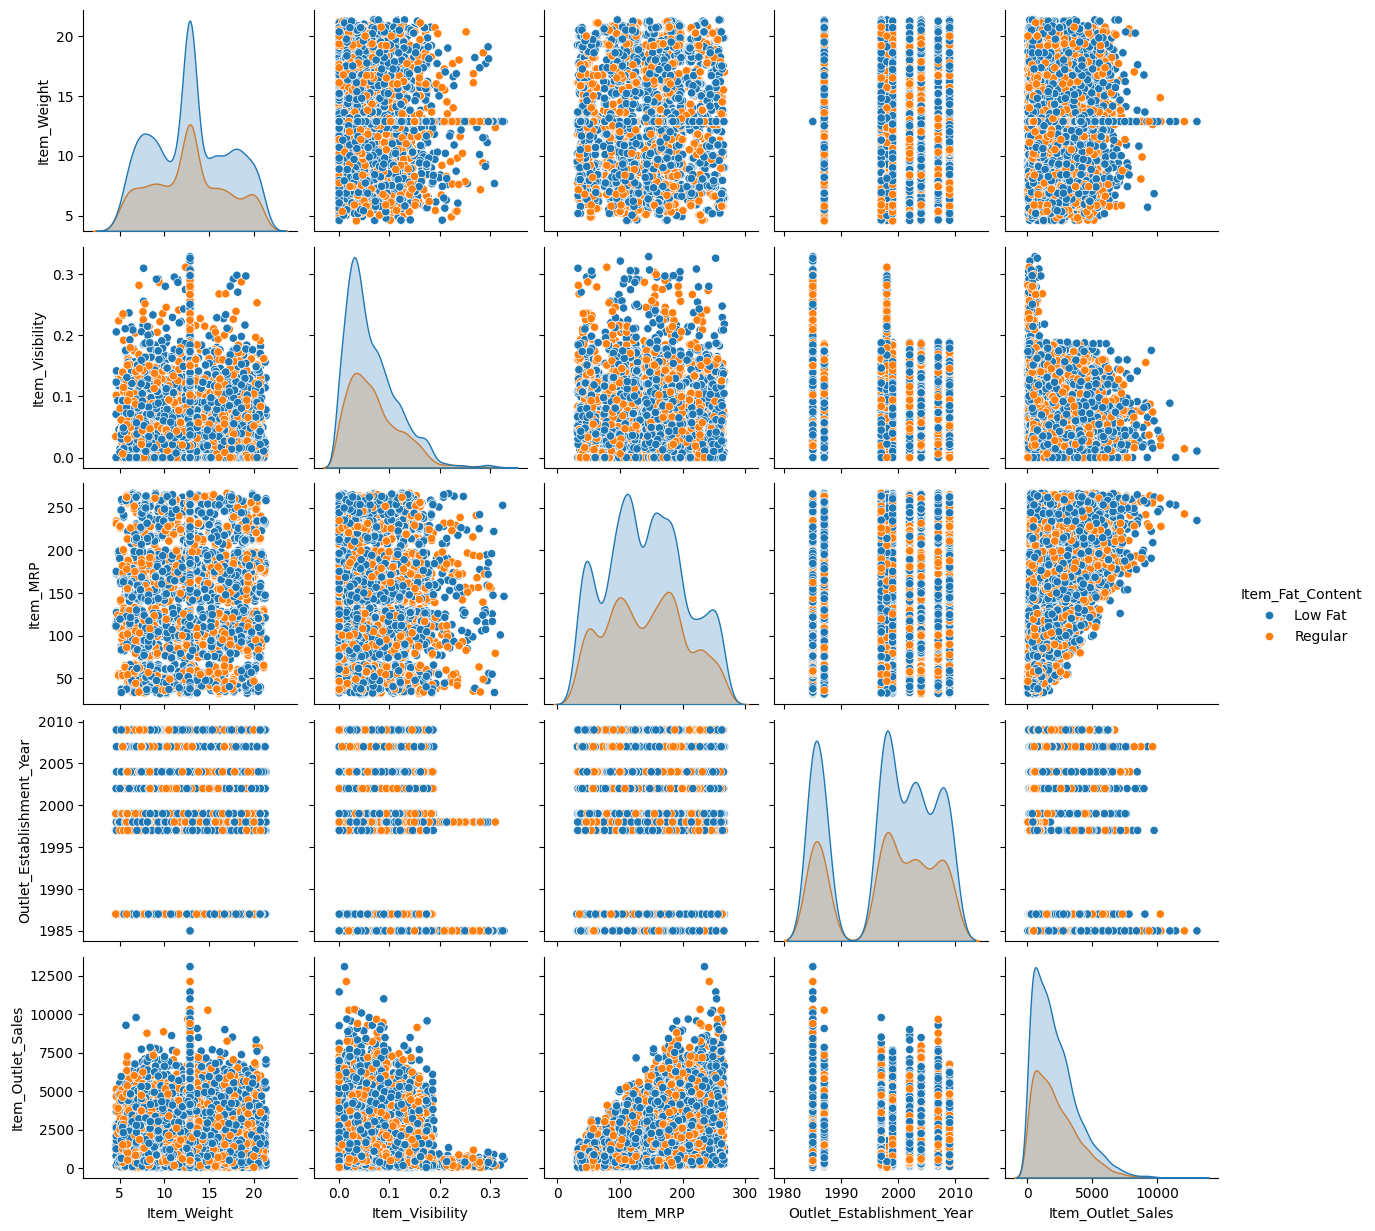

In [68]:
#Pairplot to show paired relationships between numerical variables in the sales data
ax=sns.pairplot(df_sales_prediction,hue='Item_Fat_Content')

- In this pairplot, it's observed that there is a distinct negative correlation between Item_Outlet_Sales & Item_Visibility(as Item visibilty increases, Item_Outlet_Sales descrease and vice versa), between Item_Outlet_Sales & Item_MRP there is a postive correlation (As Item_MRP increases, the Item_Outlet_Sales are also increasing and vice versa).
- The negative correlation between tem_Outlet_Sales & Item_Visibility needs further investigation and information from the stakeholders since in the real world it's presumed that increased item visibility should inturn bring in more sales.

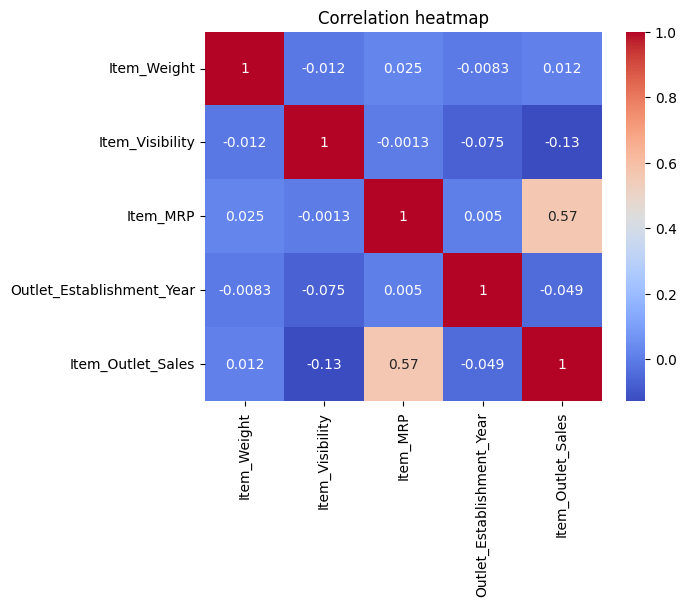

In [60]:
#Heatmap further showing the different correlation types between the numeric columns in the sales data:
corr_df=df_sales_prediction.corr(numeric_only=True)
ax=sns.heatmap(corr_df,cmap='coolwarm',annot=True)
ax.set_title('Correlation heatmap');

- It is affirmed that there is a positive correlation observed between Item_Outlet_Sales & Item_MRP.
And a negative correlation observed between Item_Outlet_sales & Item_Visibility.

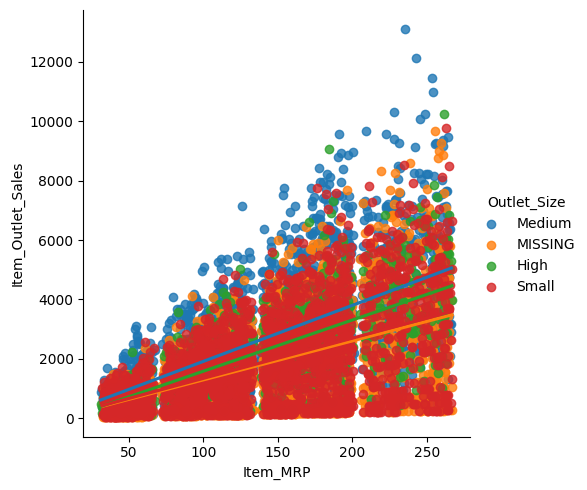

In [71]:
#lmplot to further explain in detail, the positive correlation between Item_MRP and Item_Outlet_Sales within different Oulet_Sizes.
ax=sns.lmplot(df_sales_prediction,x='Item_MRP',y='Item_Outlet_Sales', hue='Outlet_Size');

- The Small outlets are predominantly moving most of the item sales as shown.

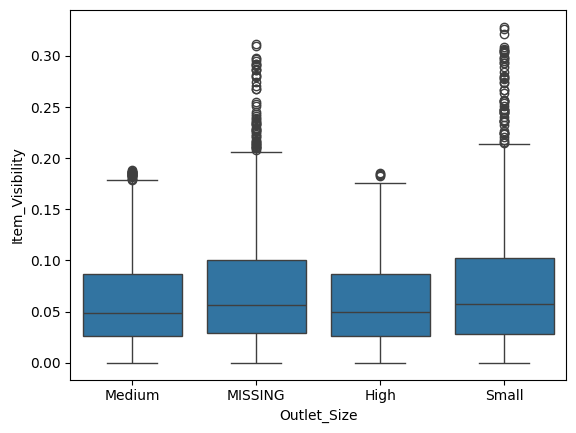

In [79]:
#boxplot showing the relationship between item_visibility & outlet size
ax=sns.boxplot(df_sales_prediction,x='Outlet_Size',y='Item_Visibility')

- The boxplot for the Item_Visibility measurement for the different outlet sizes shows that small outlet sizes have a high median value. There is a minimal variation in the measurement for High outlet sizes.
- There are more outliers in the boxplot for the small and the 'MISSING' outlet sizes.

## Feature Inspection